In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
import string
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [10]:
twitter = pd.read_csv("twitter_data.csv", header = None)

In [22]:
twitter[3] = pd.to_datetime(twitter[3])

In [2]:
hacker_news = pd.read_csv("hn_data.csv", header = None)

In [3]:
reddit = pd.read_csv("reddit_data.csv", header = None)

In [4]:
reddit.head()

,0,1,2,3,4,5,6,7
0,yo8cye,technology,Medibank Won't Pay Ransom for Data Breach,NaN,1.00,1,0,1
1,yo7zw2,technology,Facebook parent Meta is preparing large-scale ...,NaN,1.00,5,0,5
2,yo7yga,technology,Permanent Daylight Saving Time will hurt our h...,NaN,0.45,0,0,0
3,yo7lyh,technology,"Founder of Oculus, Palmer Luckey, Creates VR H...",NaN,0.50,0,0,0
4,yo6io4,technology,Candidates Keep Pushing Election Denial Online...,NaN,0.90,68,0,68


In [12]:
twitter.head()

,0,1,2,3,4
0,1589423569410236416,"RT @estella_dawn: @TRBOX33 @TRBOX33 Nawww, tha...",136314158,2022-11-07 01:04:43,"[{""created_at"": ""2010-04-23T15:45:59.000Z"", ""i..."
1,1589423573592309760,RT @hsxsvgolden: @HarryTo100 Novi\n\nI’m votin...,1498075959928438784,2022-11-07 01:04:44,"[{""created_at"": ""2022-02-27T23:22:07.000Z"", ""i..."
2,1589423569393811456,#목소리_들어보고싶으면_마음_들어봤으면_인용후기 \n해줘 https://t.co/S...,1516331761608761345,2022-11-07 01:04:43,"[{""created_at"": ""2022-04-19T08:24:14.000Z"", ""i..."
3,1589423569406431234,やっと錬金できた！早く大魔導師になれるようにレベリング頑張ります！\n#ドラクエ\n#ドラゴ...,1584508214166847488,2022-11-07 01:04:43,"[{""created_at"": ""2022-10-24T11:33:07.000Z"", ""i..."
4,1589423569385435138,RT @Rconstantino: 👇 https://t.co/WO7qS4kdxE,56362089,2022-11-07 01:04:43,"[{""created_at"": ""2009-07-13T12:42:37.000Z"", ""i..."


In [6]:
hacker_news.head()

,0,1,2,3,4,5,6
0,33490883,zhengiszen,0,1,1667728272,GitHub – kelleyma49/PSFzf: A PowerShell wrappe...,https://github.com/kelleyma49/PSFzf
1,33490897,corentin88,0,3,1667728447,Why did Google remove the “I'm Feeling Lucky” ...,https://www.quora.com/Why-did-Google-remove-th...
2,33490948,zeristor,1,2,1667728948,Asterank,http://www.asterank.com/
3,33490956,l-m-z,0,1,1667729045,An OCaml port of min-DALLE,https://github.com/ArulselvanMadhavan/mini_dalle
4,33491056,homarp,0,1,1667729865,Being Glue,https://noidea.dog/glue


In [13]:
vectorizer = TfidfVectorizer(stop_words={'english'})

In [14]:
twitter_corpus = twitter[1].dropna().to_list()
twitter_features = vectorizer.fit_transform(twitter_corpus)

# Clustering

## Hacker News Clustering

In [15]:
hn_corpus = hacker_news[5].to_list()
hn_features = vectorizer.fit_transform(hn_corpus)

In [16]:

def cluster_text(features, corpus, true_k =3):
    Sum_of_squared_distances = []
    K = range(2,10)
    for k in K:
        model = KMeans(n_clusters=k, max_iter=200, n_init=10)
        model = model.fit(features)
        Sum_of_squared_distances.append(model.inertia_)
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
    model.fit(features)

    labels=model.labels_
    clusters=pd.DataFrame(list(zip(corpus,labels)),columns=['title','cluster'])
        
    return clusters

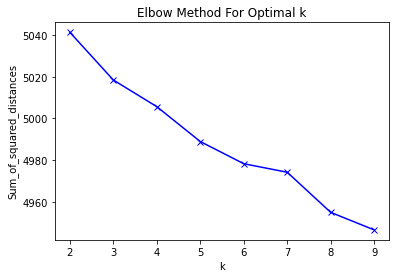

In [17]:
hn_clusters = cluster_text(hn_features,hn_corpus,5)

## Reddit data Clustering

In [18]:
reddit_corpus = reddit[2].to_list()
reddit_features = vectorizer.fit_transform(reddit_corpus)

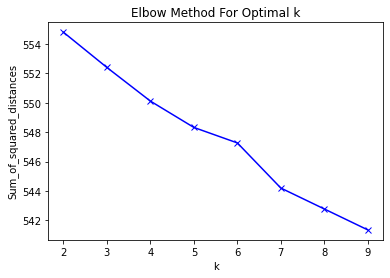

In [19]:
reddit_clusters = cluster_text(reddit_features,reddit_corpus)

#### Both Reddit data and Hacker news data is suggesting 5 clusters

## Twitter data collection

In [23]:
twitter_data_fetch = pd.DataFrame(twitter[3].dt.date.value_counts()).reset_index()

In [24]:
twitter_data_fetch = twitter_data_fetch.sort_values(by = "index")

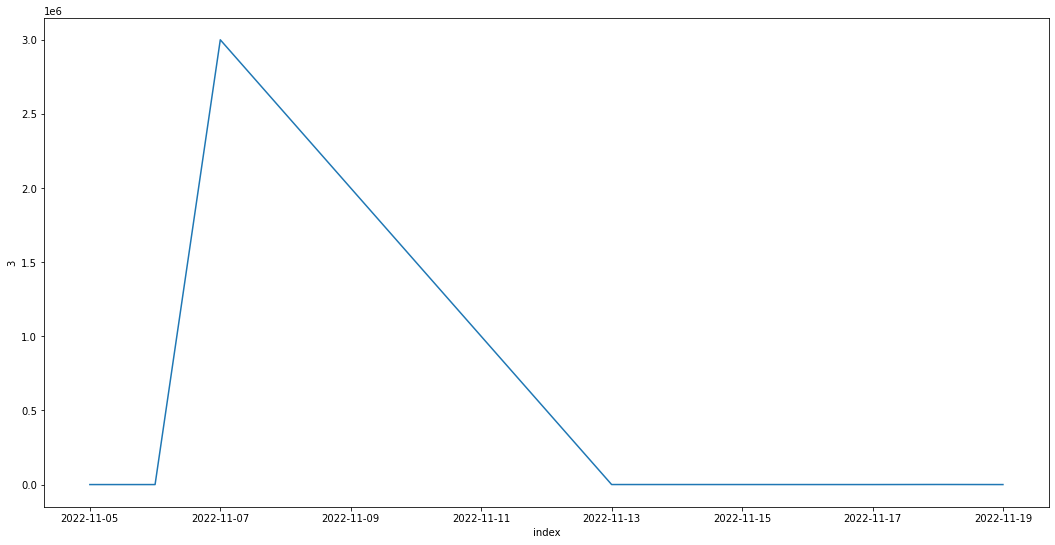

In [25]:
plt.subplots(figsize = (18,9))
sns.lineplot(x = 'index', y = 3, data=twitter_data_fetch);

# Data Analysis

In [26]:
import nltk

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kandijaganmohanreddy/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kandijaganmohanreddy/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
print(f"Number of reddit datapoints fetched based on subredit technology : {len(reddit)}")

Number of reddit datapoints fetched based on subredit technology : 567


In [30]:
print(f"Number of Hacker News datapoints fetched based on subredit technology : {len(hacker_news)}")

Number of Hacker News datapoints fetched based on subredit technology : 5107


## Comparing Reddit and Hacker News datasets

### Plot Comparing 2 datasets

#### We shall use wordclouds and see what are the most discussed topics in each of the platform

In [31]:


def most_common_word(corpus):
    words = corpus.split()
    word_counts = Counter(words)
    return word_counts.most_common(1)[0]

In [32]:
# pip install wordcloud

In [33]:
def tokenize_and_remove_stopwords(text):
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    words = [w for w in words if w not in stopwords and w not in string.punctuation]
    return words

In [34]:
hn_tokenized = tokenize_and_remove_stopwords(" ".join(hn_corpus))

In [35]:
twitter_tokenized = tokenize_and_remove_stopwords(" ".join(twitter_corpus))

In [36]:
def create_word_cloud(words):
    wordcloud = WordCloud(background_color="white").generate(' '.join(words))
    plt.subplots(figsize=(18,8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

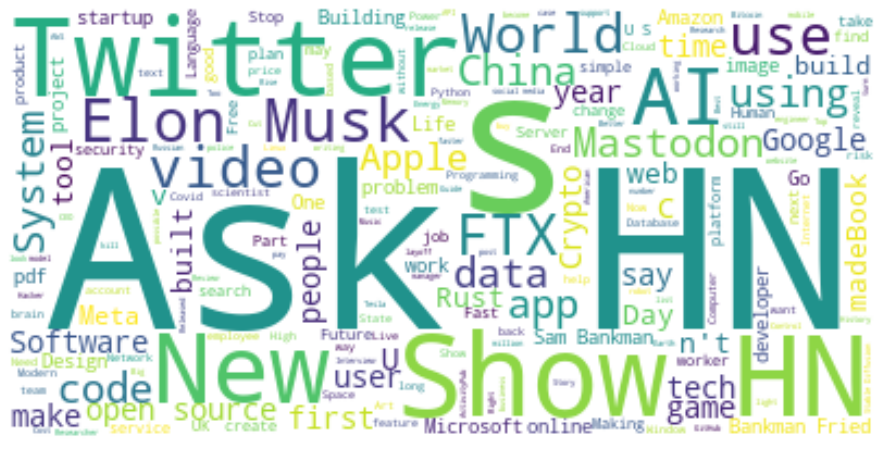

In [37]:
create_word_cloud(hn_tokenized)

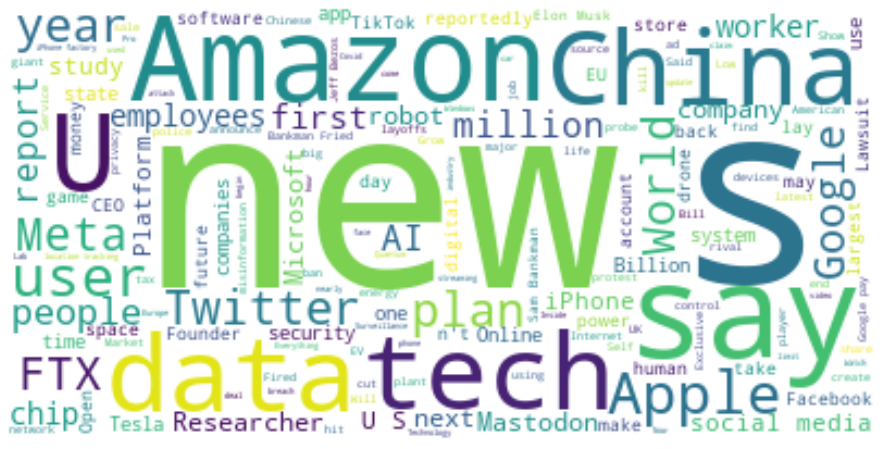

In [38]:
reddit_tokenized = tokenize_and_remove_stopwords(" ".join(reddit_corpus))
create_word_cloud(reddit_tokenized)

##### Both of the atasets have common terms like Apple, Twitter etc

## Comparing 3 datasets

##### Let's check how many ties the words apple and twitter are repeated in all 3 datasets

In [39]:
reddit_lowered = " ".join(reddit_tokenized).lower()
hn_lowered = " ".join(hn_tokenized).lower()
twitter_lowered = " ".join(twitter_tokenized).lower()

In [40]:
def top_n_repeating_words(text, n):
    words = text.split()
    word_counts = Counter(words)
    return word_counts.most_common(n)

In [43]:
reddit_top_15 =  (reddit_lowered,15)
twitter_top_15 = top_n_repeating_words(twitter_lowered,15)
hn_top_15 = top_n_repeating_words(hn_lowered,15)

/Users/kandijaganmohanreddy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


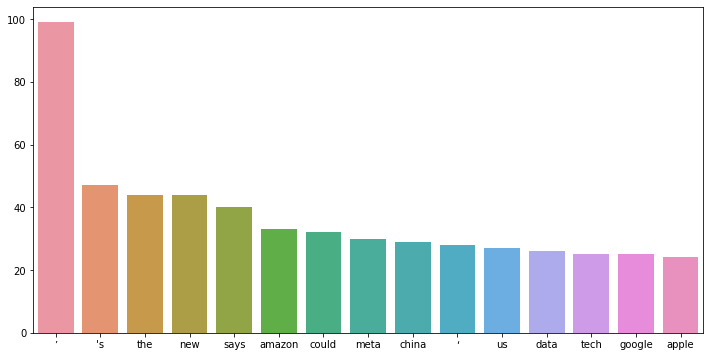

In [44]:
plt.subplots(figsize=(12,6))
sns.barplot([w[0] for w in reddit_top_15],y = [w[1] for w in reddit_top_15] );

/Users/kandijaganmohanreddy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


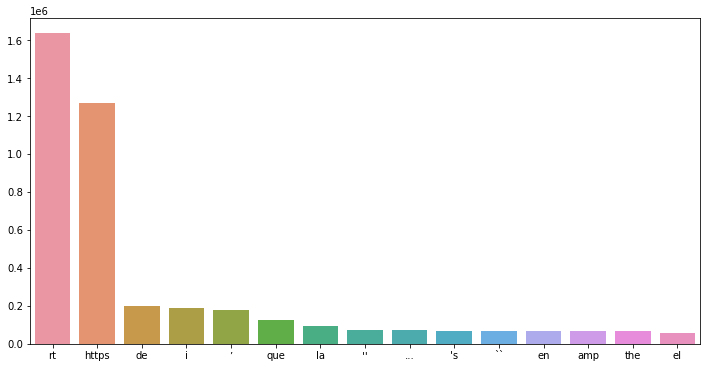

In [48]:
plt.subplots(figsize=(12,6))
sns.barplot([w[0] for w in twitter_top_15],y = [w[1] for w in twitter_top_15] );

/Users/kandijaganmohanreddy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


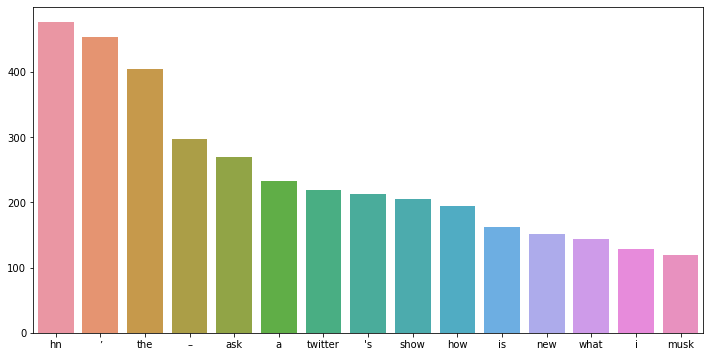

In [49]:
plt.subplots(figsize=(12,6))
sns.barplot([w[0] for w in hn_top_15],y = [w[1] for w in hn_top_15] );